In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import figure

In [10]:
import numpy as np
data = pd.read_csv("forecast1.csv")

In [11]:
data['Date'] = pd.to_datetime(data['Date'])
df = data.set_index(['Date'])

In [14]:
from datetime import datetime
df.head()

,Sales
Date,
2020-09-06,6
2020-09-12,3
2020-09-18,6
2020-09-24,9
2020-09-30,3


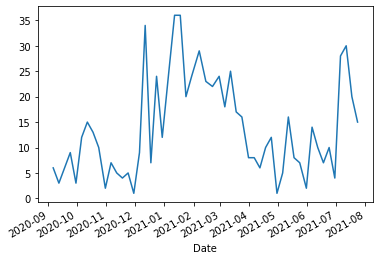

In [13]:
df['Sales'].plot();

In [432]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [436]:
adf_test(df['Sales'])

Results of Dickey-Fuller Test:
Test Statistic                 -2.133945
p-value                         0.231086
#Lags Used                      6.000000
Number of Observations Used    46.000000
Critical Value (1%)            -3.581258
Critical Value (5%)            -2.926785
Critical Value (10%)           -2.601541
dtype: float64


In [437]:
from statsmodels.tsa.stattools import kpss
#define KPSS
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [438]:
kpss_test(df['Sales'])

Results of KPSS Test:
Test Statistic            0.115225
p-value                   0.100000
Lags Used                11.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


In [439]:
df.shape

(53, 1)

In [4]:
df = pd.read_csv("diff.csv", index_col=[0])
df.head()

,Sales
Date,
12-Sep-20,-3
18-Sep-20,3
24-Sep-20,3
30-Sep-20,-6
6-Oct-20,9


In [6]:
from statsmodels.tsa.arima_model import ARIMA
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

## data differencing

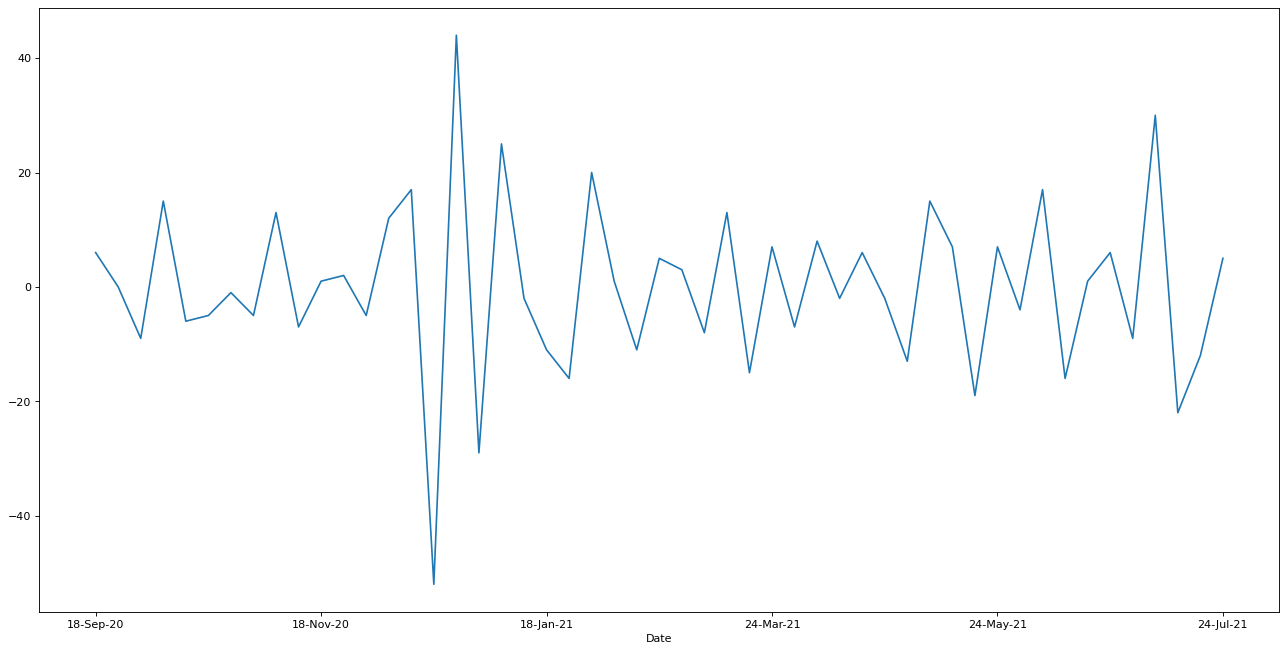

In [33]:
figure(figsize=(20, 10), dpi=80)
df['diff'] = df['Sales'] - df['Sales'].shift(1)
df=df.dropna()
df['diff'].plot()

The data used has been checked for stationary and transformed into stationary data using the differencing method.

Differentiating the data is done by calculating the difference between one period and the previous period. The data is differencing once before forecasting using ARIMA.

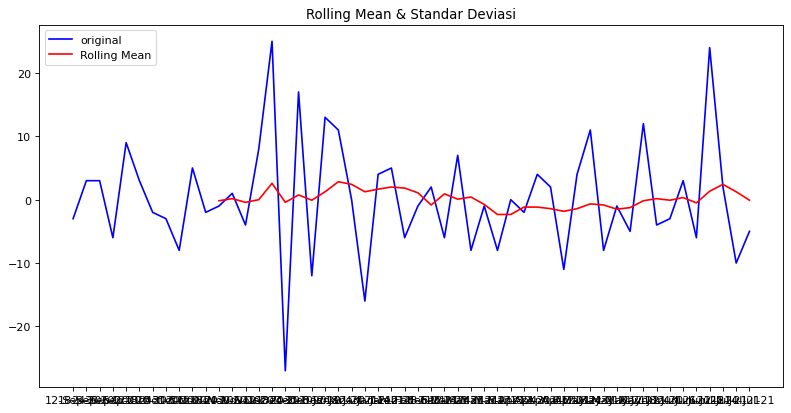

In [508]:
figure(figsize=(12,6), dpi=80)
rolmean = df_diff.rolling(window =12).mean()
rolstd =  df_diff.rolling(window =12).std()
orig = plt.plot(df_diff, color='blue', label='original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')

plt.legend(loc='best')
plt.title('Rolling Mean & Standar Deviasi')
plt.show(block=False)

In [34]:
df_diff = pd.read_csv("diff.csv", index_col=[0])
df

,Sales,prediction,diff
Date,,,
18-Sep-20,3,1.270606,6.0
24-Sep-20,3,-0.892571,0.0
30-Sep-20,-6,-2.109840,-9.0
6-Oct-20,9,2.138554,15.0
12-Oct-20,3,-3.788042,-6.0
18-Oct-20,-2,-3.752369,-5.0
24-Oct-20,-3,-0.969077,-1.0
31-Oct-20,-8,1.123256,-5.0
6-Nov-20,5,5.046044,13.0


In [35]:
stepwise_fit = auto_arima(df_diff, stationary =True, seasonal =False,trace=False, suppress_warning=True)

stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   52
Model:               SARIMAX(0, 0, 1)   Log Likelihood                -181.709
Date:                Thu, 29 Jul 2021   AIC                            367.418
Time:                        11:03:10   BIC                            371.321
Sample:                             0   HQIC                           368.915
                                 - 52                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5531      0.104     -5.308      0.000      -0.757      -0.349
sigma2        63.0493      8.665      7.276      0.000      46.066      80.033
===================================================================================
Ljung-Box (Q):                       47.62   Jarque-Bera (JB):                19.71
Prob(Q):                              0.19   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                             1.21
Prob(H) (two-sided):                  0.78   Kurtosis:                         4.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

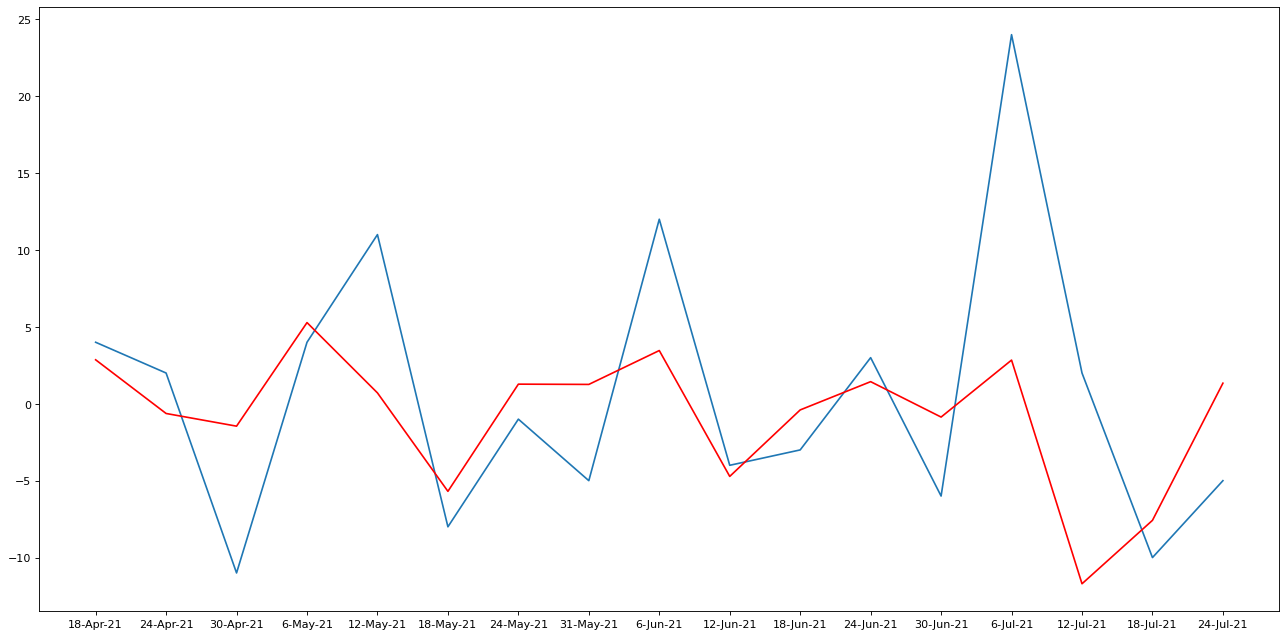

In [36]:
figure(figsize=(20, 10), dpi=80)
model = SARIMAX(df_diff, order=(0, 0, 1))  
result_AR = model.fit(disp=-1)  
plt.plot(df_diff[35:])
pred = result_AR.fittedvalues
plt.plot(pred[35:], color='red')

In [37]:
df_prediksi = pd.DataFrame(pred, 
             columns=['arima'])
df_prediksi.head()

,arima
Date,
12-Sep-20,0.000000
18-Sep-20,1.270606
24-Sep-20,-0.892571
30-Sep-20,-2.109840
6-Oct-20,2.138554


In [38]:
df_prediksi_merge = pd.merge(df_diff, df_prediksi, on='Date')
df_prediksi_merge.to_excel("hasilarima.xlsx") 
df_forecast = df_model_fit.forecast(steps=2)

In [498]:
df_prediksi.head()

,arima
Date,
12-Sep-20,0.259127
18-Sep-20,1.648990
24-Sep-20,-0.445084
30-Sep-20,-1.629957
6-Oct-20,2.691543


In [39]:
from sklearn.metrics import mean_squared_error
df_ar_error = mean_squared_error(df_prediksi_merge.Sales,df_prediksi_merge.arima)
np.sqrt(df_ar_error)

7.943769887543325

In [499]:
df_prediksi = pd.DataFrame(pred, 
             columns=['arima'])


df_prediksi

,arima
Date,
12-Sep-20,0.259127
18-Sep-20,1.648990
24-Sep-20,-0.445084
30-Sep-20,-1.629957
6-Oct-20,2.691543
12-Oct-20,-3.268470
18-Oct-20,-3.251163
24-Oct-20,-0.441830
31-Oct-20,1.692530


In [500]:
prediksi = df_prediksi['arima'].apply(np.ceil)

In [501]:
df_prediksi = pd.DataFrame(prediksi, 
             columns=['arima'])
df_prediksi.head()

,arima
Date,
12-Sep-20,1.0
18-Sep-20,2.0
24-Sep-20,-0.0
30-Sep-20,-1.0
6-Oct-20,3.0


In [502]:
df_prediksi_merge = pd.merge(df_diff, df_prediksi, on='Date')
df_prediksi_merge.shape

(52, 2)

In [503]:
df_ar_error = mean_squared_error(df_prediksi_merge.Sales,df_prediksi_merge.arima)
np.sqrt(df_ar_error)

7.920275830472651

In [504]:
df_ar_2 = df_prediksi_merge.iloc[50: , :]
df_ar_2

,Sales,arima
Date,,
18-Jul-21,-10,-7.0
24-Jul-21,-5,2.0


In [505]:
df_ar_error = mean_squared_error(df_ar_2.Sales,df_ar_2.arima)
np.sqrt(df_ar_error)

5.385164807134504

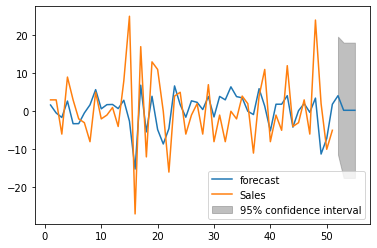

In [506]:
result_AR.plot_predict(1,55)
x=result_AR.forecast(steps=4)

In [507]:
result_AR.forecast(steps=4)

(array([4.09630076, 0.25912692, 0.25912692, 0.25912692]),
 array([7.91895133, 9.07749283, 9.07749283, 9.07749283]),
 array([[-11.42455864,  19.61716016],
        [-17.5324321 ,  18.05068595],
        [-17.5324321 ,  18.05068595],
        [-17.5324321 ,  18.05068595]]))

## Result
MAE is used to find out the size of the error and helps determine the amount of loss when there is an excess stock of goods.

based on a large **MAE value**, then there is a possibility that there is **an excess of forecasting results as much as 5 boxes** of fruit salad. **The loss to be borne financially is Rp. 172,700.**

The cost calculation is adjusted to the need for fruit per salad box and the highest price of fruit in June.

The **results of forecasting with the ARIMA method obtained differencing values of fruit salad sales in the next 2 periods are 8 and 9**. 

## Result of the forecasting for each week

So that in the next 2 weeks it is predicted that the number of fruit salads sold is 23 boxes and
32 boxes. Total sales from July 25, 2021 to August 7, 2021 were 55 boxes of fruit salad.

#### Trying to look for the seasonality

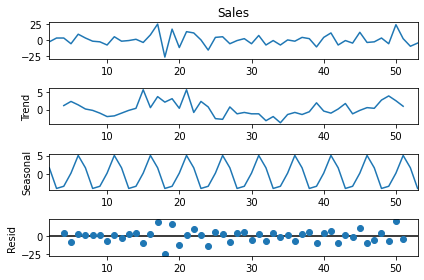

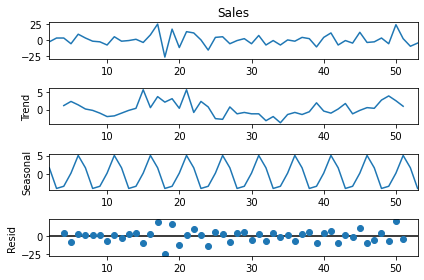

In [25]:
# Importing required libraries
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
  
# Read the AirPassengers dataset
dataa = pd.read_csv('forecas.csv',
                       index_col ='Date',
                       parse_dates = True)
dataa=dataa.dropna()
# Print the first five rows of the dataset
dataa.head()
  
# ETS Decomposition
result = seasonal_decompose(dataa['Sales'], 
                            model ='additive',period=5)
  
# ETS plot 
result.plot()